# EDA

In [1]:
# Ici on importera toutes les librairies qui nous permettront de mener à bien notre étude

import pandas as pd
import matplotlib.pyplot as plt
import duckdb

In [2]:
dataset = pd.read_excel("../data/raw/online_retail_II.xlsx") # Import de la base de données
dataset.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Cette cellule nous permet de vérifier les informations globales de notre base afin d'identifier 
# les problèmes possible
 
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
# On vérfie ici quel est le nombre global de valuers manquantes par colonne
# Ceci facilite la lecture par rapport aux valeurs plus haut

dataset.isna().sum().sort_values(ascending=False)

Customer ID    107927
Description      2928
StockCode           0
Invoice             0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [5]:
# On supprime les lignes sans CustomerID
dataset_clean = dataset.dropna(subset=['Customer ID']).copy()

# On remplit toutes les "Description" manquantes
dataset_clean['Description'].fillna('Unknown', inplace=True)


/var/folders/5g/fyfxjdw90_sg35qfwtqy8wq80000gn/T/ipykernel_849/4227672565.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_clean['Description'].fillna('Unknown', inplace=True)


In [6]:
dataset_clean.shape

(417534, 8)

In [7]:
# On crée une colonne chiffre d'affaires
dataset_clean['TotalPrice'] = dataset_clean['Quantity'] * dataset_clean['Price']

# On calcule le CA total
dataset_clean['TotalPrice'].sum()


np.float64(8348208.574)

In [8]:
top_products = dataset_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER     148876.66
REGENCY CAKESTAND 3 TIER               136866.30
ASSORTED COLOUR BIRD ORNAMENT           69854.96
JUMBO BAG RED RETROSPOT                 51608.40
POSTAGE                                 45520.86
ROTATING SILVER ANGELS T-LIGHT HLDR     39902.10
PAPER CHAIN KIT 50'S CHRISTMAS          36866.45
PARTY BUNTING                           34998.70
JUMBO BAG STRAWBERRY                    33893.70
VINTAGE UNION JACK BUNTING              33546.96
Name: TotalPrice, dtype: float64


In [9]:
top_clients = dataset_clean.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_clients)

Customer ID
18102.0    341776.73
14646.0    243853.05
14156.0    183180.55
14911.0    137675.91
13694.0    128172.42
17511.0     83760.60
15061.0     82162.74
16684.0     75610.17
13089.0     55828.31
16754.0     54558.18
Name: TotalPrice, dtype: float64


In [10]:
dataset_clean['Quantity'].describe()

count    417534.000000
mean         12.758815
std         101.220424
min       -9360.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [11]:
dataset_clean[dataset_clean['Quantity'] < 0]['Quantity'].count()

np.int64(9839)

In [12]:
dataset_clean[dataset_clean['Quantity'] > 1000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
7302,490018,21981,PACK OF 12 WOODLAND TISSUES,4320,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,1080.00
7303,490018,21967,PACK OF 12 SKULL TISSUES,5184,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,1296.00
7304,490018,21984,PACK OF 12 PINK PAISLEY TISSUES,4008,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,1002.00
7305,490018,21980,PACK OF 12 RED SPOTTY TISSUES,4008,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,1002.00
22100,491133,16014,SMALL CHINESE STYLE SCISSOR,1500,2009-12-09 16:17:00,0.32,13848.0,United Kingdom,480.00
...,...,...,...,...,...,...,...,...,...
509303,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE,230.40
519373,537659,22189,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102.0,United Kingdom,2328.48
519374,537659,22188,BLACK HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102.0,United Kingdom,2328.48
522809,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755.0,Japan,3794.40


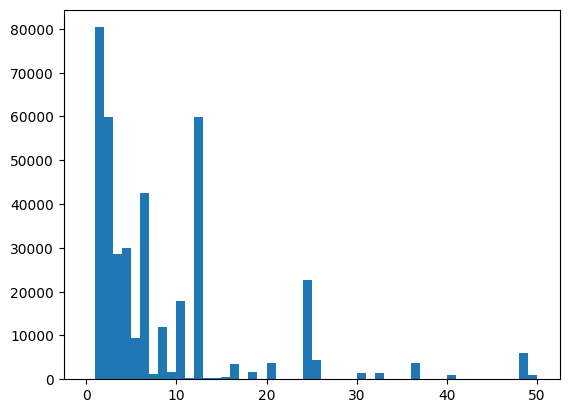

In [13]:
plt.hist(dataset_clean['Quantity'], bins=50, range=(0,50))
plt.show()


In [14]:
# Séparer les 3 types de lignes
retours = dataset_clean[dataset_clean['Quantity'] < 0]
grosses_commandes = dataset_clean[dataset_clean['Quantity'] > 1000]
commandes_normales = dataset_clean[(dataset_clean['Quantity'] > 0) & (dataset_clean['Quantity'] <= 1000)]

# Chiffre d'affaires total net
CA_total_net = dataset_clean['Price'].sum()

# Top 10 produits (excluant retours)
top_products = commandes_normales.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Top 10 clients (excluant retours)
top_clients = commandes_normales.groupby('Customer ID')['Price'].sum().sort_values(ascending=False).head(10)


# Création de la base de donnée

In [15]:
fact_sales = dataset_clean[[
    'Invoice',
    'InvoiceDate',
    'Customer ID',
    'StockCode',
    'Quantity',
    'Price',
    'TotalPrice'
]].copy()

fact_sales['date'] = fact_sales['InvoiceDate'].dt.date
fact_sales = fact_sales.drop(columns=['InvoiceDate'])

In [16]:
dim_customers = (
    dataset_clean
    .groupby('Customer ID')['Country']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

In [17]:
dim_products = (
    dataset_clean
    .groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

In [18]:
print(fact_sales.shape)
print(dim_customers.shape)
print(dim_products.shape)


(417534, 7)
(4383, 2)
(4031, 2)


In [19]:
print(dim_customers['Customer ID'].is_unique)
print(dim_products['StockCode'].is_unique)

True
True


In [43]:

date_range = pd.date_range(
    start=dataset_clean['InvoiceDate'].min(),
    end=dataset_clean['InvoiceDate'].max(),
    freq='D'
)

dim_date = pd.DataFrame({'date': date_range})


In [44]:
dim_date['year'] = dim_date['date'].dt.year
dim_date['month'] = dim_date['date'].dt.month
dim_date['month_name'] = dim_date['date'].dt.month_name()
dim_date['day'] = dim_date['date'].dt.day
dim_date['weekday'] = dim_date['date'].dt.weekday + 1  # lundi = 1
dim_date['weekday_name'] = dim_date['date'].dt.day_name()
dim_date['is_weekend'] = dim_date['weekday'] >= 6
dim_date['date'] = dim_date['date'].dt.date


In [45]:
dim_date.head()
dim_date.tail()
dim_date.shape
dim_date['date'].is_unique

True

In [46]:
# Connexion à DuckDB (base locale)
con = duckdb.connect(database='../data/warehouse.duckdb', read_only=False)

# Charger les tables pandas dans DuckDB
con.register('fact_sales', fact_sales)
con.register('dim_customers', dim_customers)
con.register('dim_products', dim_products)
con.register('dim_date', dim_date)


In [47]:
con.sql("SHOW TABLES").df()


,name
0,dim_customers
1,dim_date
2,dim_products
3,fact_sales


In [48]:
print(con.execute("SELECT COUNT(*) FROM fact_sales").fetchall())
print(con.execute("SELECT COUNT(*) FROM dim_customers").fetchall())
print(con.execute("SELECT COUNT(*) FROM dim_products").fetchall())
print(con.execute("SELECT COUNT(*) FROM dim_date").fetchall())

[(417534,)]
[(4383,)]
[(4031,)]
[(374,)]


In [49]:
con.execute("""
SELECT
    SUM("Customer Id" IS NULL),
    SUM(StockCode IS NULL),
    SUM(date IS NULL)
FROM fact_sales
""").fetchall()


[(0, 0, 0)]

In [50]:
con.execute("""
SELECT COUNT(*)
FROM fact_sales f
LEFT JOIN dim_customers c ON f."Customer Id" = c."Customer Id"
WHERE c."Customer Id" IS NULL
""").fetchall()


[(0,)]

In [51]:
con.execute("""
SELECT COUNT(*)
FROM fact_sales f
LEFT JOIN dim_products c ON f.StockCode = c.StockCode
WHERE c.StockCode IS NULL
""").fetchall()


[(0,)]

In [52]:
con.execute("""
SELECT COUNT(*)
FROM fact_sales f
LEFT JOIN dim_date c ON f.date = c.date
WHERE c.date IS NULL
""").fetchall()


[(0,)]

In [56]:
con.execute("""
SELECT "Customer Id", COUNT(*)
FROM dim_customers
GROUP BY "Customer Id"
HAVING COUNT(*) > 1
""").fetchall()


[]

In [58]:
con.execute("""
SELECT StockCode, COUNT(*)
FROM dim_products
GROUP BY StockCode
HAVING COUNT(*) > 1
""").fetchall()


[]

In [59]:
con.execute("""
SELECT date, COUNT(*)
FROM dim_date
GROUP BY date
HAVING COUNT(*) > 1
""").fetchall()


[]

In [61]:
con.execute("""
SELECT SUM(totalprice)
FROM fact_sales
""").fetchall()


[(8348208.573998757,)]

In [62]:
con.execute("""
SELECT COUNT(DISTINCT "customer id")
FROM fact_sales;

""").fetchall()


[(4383,)]

In [64]:
con.execute("""
SELECT stockcode, SUM(quantity) AS total_qty
FROM fact_sales
GROUP BY stockcode
ORDER BY total_qty DESC
LIMIT 10;
""").fetchall()


[('21212', 56840),
 ('85123A', 55861),
 ('84077', 54274),
 ('85099B', 48700),
 ('17003', 47430),
 ('84879', 44120),
 ('84991', 35630),
 ('21977', 30888),
 ('22197', 28450),
 ('37410', 25679)]

In [65]:
con.execute("""
SELECT
    d.year,
    d.month,
    SUM(f.totalprice) AS revenue
FROM fact_sales f
JOIN dim_date d USING(date)
GROUP BY 1,2
ORDER BY 1,2;

""").fetchall()


[(2009, 12, 663272.0499999978),
 (2010, 1, 531952.9020000178),
 (2010, 2, 489399.58600001415),
 (2010, 3, 635996.4810000167),
 (2010, 4, 560635.0220000078),
 (2010, 5, 559924.5500000105),
 (2010, 6, 571459.9100000149),
 (2010, 7, 562785.9000000143),
 (2010, 8, 587256.4599999989),
 (2010, 9, 781033.3009999989),
 (2010, 10, 964989.7799999984),
 (2010, 11, 1134879.281999888),
 (2010, 12, 304623.34999999846)]

In [68]:
con.execute("""
SELECT
    p.description,
    SUM(f.totalprice) AS revenue
FROM fact_sales f
JOIN dim_products p
ON f.stockcode = p.stockcode
GROUP BY p.description
ORDER BY revenue DESC
LIMIT 10
""").fetchall()


[('WHITE HANGING HEART T-LIGHT HOLDER', 148876.65999999992),
 ('REGENCY CAKESTAND 3 TIER', 136866.29999999996),
 ('JUMBO BAG RED RETROSPOT', 85203.60000000003),
 ('ASSORTED COLOUR BIRD ORNAMENT', 69854.96000000031),
 ('POSTAGE', 45520.86),
 ('DOOR MAT UNION FLAG', 41014.079999999856),
 ('ROTATING SILVER ANGELS T-LIGHT HLDR', 39902.09999999997),
 ('RED RETROSPOT CAKE STAND', 38797.23999999999),
 ("PAPER CHAIN KIT 50'S CHRISTMAS ", 36866.45000000004),
 ('DOOR MAT RED SPOT', 36252.019999999895)]

In [69]:
con.execute("""
SELECT
    c."customer id",
    SUM(f.totalprice) AS revenue
FROM fact_sales f
JOIN dim_customers c
ON f."customer id" = c."customer id"
GROUP BY c."customer id"
ORDER BY revenue DESC
LIMIT 10
""").fetchall()


[(18102.0, 341776.7299999999),
 (14646.0, 243853.04999999978),
 (14156.0, 183180.5499999999),
 (14911.0, 137675.91000000053),
 (13694.0, 128172.41999999995),
 (17511.0, 83760.59999999999),
 (15061.0, 82162.73999999996),
 (16684.0, 75610.17000000001),
 (13089.0, 55828.31),
 (16754.0, 54558.17999999999)]

In [70]:
con.execute("""
SELECT
    d.year,
    d.month,
    COUNT(DISTINCT f.invoice) AS nb_orders
FROM fact_sales f
JOIN dim_date d
ON f.date = d.date
GROUP BY d.year, d.month
ORDER BY d.year, d.month
""").fetchall()


[(2009, 12, 1900),
 (2010, 1, 1296),
 (2010, 2, 1335),
 (2010, 3, 1907),
 (2010, 4, 1615),
 (2010, 5, 1768),
 (2010, 6, 1833),
 (2010, 7, 1713),
 (2010, 8, 1547),
 (2010, 9, 2041),
 (2010, 10, 2586),
 (2010, 11, 3145),
 (2010, 12, 901)]

In [71]:
con.execute("""
CREATE OR REPLACE TABLE mart_monthly_revenue AS
SELECT
    d.year,
    d.month,
    SUM(f.totalprice) AS revenue,
    COUNT(DISTINCT f.invoice) AS nb_orders
FROM fact_sales f
JOIN dim_date d
ON f.date = d.date
GROUP BY d.year, d.month
ORDER BY d.year, d.month
""")


In [72]:
con.execute("""
CREATE OR REPLACE TABLE mart_product_performance AS
SELECT
    p.stockcode,
    p.description,
    SUM(f.quantity) AS total_quantity,
    SUM(f.totalprice) AS revenue
FROM fact_sales f
JOIN dim_products p
ON f.stockcode = p.stockcode
GROUP BY p.stockcode, p.description
""")


In [74]:
con.execute("""
CREATE OR REPLACE TABLE mart_customer_performance AS
SELECT
    c."customer id",
    COUNT(DISTINCT f.invoice) AS nb_orders,
    SUM(f.totalprice) AS total_spent
FROM fact_sales f
JOIN dim_customers c
ON f."customer id" = c."customer id"
GROUP BY c."customer id"
""")


In [75]:
con.execute("SHOW TABLES").fetchall()


[('dim_customers',),
 ('dim_date',),
 ('dim_products',),
 ('fact_sales',),
 ('mart_customer_performance',),
 ('mart_monthly_revenue',),
 ('mart_product_performance',)]

In [76]:
fact_sales.columns


Index(['Invoice', 'Customer ID', 'StockCode', 'Quantity', 'Price',
       'TotalPrice', 'date'],
      dtype='object')

In [77]:
df_monthly = con.execute("SELECT * FROM mart_monthly_revenue").df()

df_monthly.head()


,year,month,revenue,nb_orders
0,2009,12,663272.050,1900
1,2010,1,531952.902,1296
2,2010,2,489399.586,1335
3,2010,3,635996.481,1907
4,2010,4,560635.022,1615
